In [37]:
%env KREAS_BACKEND=tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#NN相關的
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD,Adam

from keras.datasets import mnist #資料庫

env: KREAS_BACKEND=tensorflow


# 資料輸入
從mnist資料庫載入訓練資料

In [21]:
#讀入mnist data
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

檢視資料筆數

In [22]:
print("共 %d 筆訓練資料，每筆資料尺寸為 %d x %d" %x_train0.shape)
print("共 %d 筆測試資料，每筆資料尺寸為 %d x %d" %x_test0.shape)

共 60000 筆訓練資料，每筆資料尺寸為 28 x 28
共 10000 筆測試資料，每筆資料尺寸為 28 x 28


圖片長像

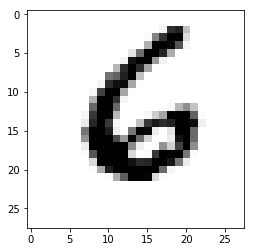

In [24]:
X = x_train0[90]
plt.imshow(X,cmap='Greys')

### 資料處理

In [25]:
x_train0 = x_train0.reshape(60000,784)
x_test0 = x_test0.reshape(10000,784)

One-hot-encoding

In [27]:
from keras.utils import to_categorical #整理資料的東西

y_train0 = to_categorical(y_train0, 10)
y_test0 = to_categorical(y_test0, 10)

# 開始架神經網絡
## 1.用Sequential的方式建一個原來的，以利於後續比較
<img src="0430/NN_O.jpg" alt="drawing" />

In [30]:
NNm = Sequential()
NNm.add(Dense(600, input_dim=784))
NNm.add(Activation('sigmoid'))
NNm.add(Dense(750))
NNm.add(Activation('relu'))
NNm.add(Dense(500))
NNm.add(Activation('sigmoid'))
#輸出層
NNm.add(Dense(10))
NNm.add(Activation('softmax'))

In [31]:
NNm.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
NNm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 600)               471000    
_________________________________________________________________
activation_5 (Activation)    (None, 600)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 750)               450750    
_________________________________________________________________
activation_6 (Activation)    (None, 750)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               375500    
_________________________________________________________________
activation_7 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5010      
__________

In [34]:
NNm.fit(x_train0,y_train0, batch_size=60, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 17s 289us/step - loss: 0.0788 - acc: 0.3720
Epoch 2/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.0467 - acc: 0.7320
Epoch 3/50
60000/60000 [==============================] - 17s 280us/step - loss: 0.0258 - acc: 0.8672
Epoch 4/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.0182 - acc: 0.89720s - loss: 0.0182 - acc: 
Epoch 5/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.0149 - acc: 0.9112
Epoch 6/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.0130 - acc: 0.9215
Epoch 7/50
60000/60000 [==============================] - 17s 279us/step - loss: 0.0118 - acc: 0.9298
Epoch 8/50
60000/60000 [==============================] - 17s 280us/step - loss: 0.0108 - acc: 0.9351
Epoch 9/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.0099 - acc: 0.9407
Epoch 10/

In [36]:
score = NNm.evaluate(x_train0,y_train0,batch_size=10000)
print("Loss : %f" %score[0])
print("Correct rate is :%f" %(score[1]*100))

60000/60000 [==============================] - 2s 40us/step
Loss : 0.001404
Correct rate is :99.225000


## 2.use functional API建另一個
中間原來的第二層跟第三層拆出來。
<img src="0430/NN_fun.jpg" alt="drawing" />

In [38]:
#打包
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add #concatenate把兩個當量結合在一起

In [39]:
x = Input(shape=(784,))

In [40]:
#定義每一層神經元數量
f1 = Dense(600,activation='sigmoid') #784->600
f2 = Dense(375,activation='relu') #600->375
f3 = Dense(375,activation='relu') #600->375
f4 = Dense(200,activation='sigmoid') #375->200
f5 = Dense(200,activation='sigmoid') #375->200
f6 = Dense(100,activation='sigmoid') #375->100
f7 = Dense(10,activation='softmax') #500->10

接著，定義層前後變數之間的關係；首先，第一個變數必定以 Input 函數來定義

In [41]:
h1 = f1(x)
h2 = f2(h1)
h3 = f3(h1)
h4 = f4(h2)
h5 = f5(h2)
h6 = f6(h3)
u = concatenate([h4,h5,h6])
y = f7(u)

In [45]:
NNmodel = Model(x,y)
NNmodel.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
NNmodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 600)          471000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 375)          225375      dense_9[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 375)          225375      dense_9[0][0]                    
__________________________________________________________________________________________________
dense_12 (

In [46]:
NNmodel.fit(x_train0,y_train0, batch_size=60, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 15s 256us/step - loss: 0.0780 - acc: 0.4195
Epoch 2/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.0445 - acc: 0.7528
Epoch 3/50
60000/60000 [==============================] - 14s 237us/step - loss: 0.0252 - acc: 0.8724
Epoch 4/50
60000/60000 [==============================] - 15s 251us/step - loss: 0.0181 - acc: 0.8986
Epoch 5/50
60000/60000 [==============================] - 14s 241us/step - loss: 0.0150 - acc: 0.9131
Epoch 6/50
60000/60000 [==============================] - 15s 248us/step - loss: 0.0131 - acc: 0.9213
Epoch 7/50
60000/60000 [==============================] - 14s 239us/step - loss: 0.0117 - acc: 0.9286
Epoch 8/50
60000/60000 [==============================] - 15s 246us/step - loss: 0.0108 - acc: 0.9340
Epoch 9/50
60000/60000 [==============================] - 15s 250us/step - loss: 0.0100 - acc: 0.9395
Epoch 10/50
60000/60000 [==============================] - 15s 248us/step - loss: 

In [47]:
score2 = NNmodel.evaluate(x_train0,y_train0,batch_size=10000)
print("Loss : %f" %score2[0])
print("Correct rate is :%f" %(score2[1]*100))

60000/60000 [==============================] - 2s 37us/step
Loss : 0.001477
Correct rate is :99.196666
